In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
df_data=pd.read_csv("kidney_disease.csv")

In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [4]:
df_data.shape

(400, 26)

In [5]:
df_data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
df_data.drop(columns=['id'],inplace=True)

In [7]:
df_data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
df_data.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [9]:
df_data.columns=['age','blood_pressure','specific_gravity','albumin','sugar','red_blood_cell','pus_cell',
                'pus_cell_clumps','bacteria','blood_glucose_random','blood_urea','serum_creatinine','sodium',
                'potassium','haemoglobin','packed_cell_volume','white_bloot_cell_count','red_blood_cell_count',
                 'hypertension','diabetes_mellitus','coronary_artery_disease','appelite','peda_edema',
                'anemia','class']

In [10]:
df_data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cell,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_bloot_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appelite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [11]:
text_columns=['packed_cell_volume','white_bloot_cell_count','red_blood_cell_count']
for i in text_columns:
    print(f"{i} :{df_data[i].dtype}")

packed_cell_volume :object
white_bloot_cell_count :object
red_blood_cell_count :object


In [12]:
def convert_text_to_numeric(df_data,column):
    df_data[column]=pd.to_numeric(df_data[column],errors='coerce')
for column in text_columns:
    convert_text_to_numeric(df_data,column)
    print(f"{column} :{df_data[column].dtype}")

packed_cell_volume :float64
white_bloot_cell_count :float64
red_blood_cell_count :float64


In [13]:
missing=df_data.isna().sum()

In [14]:
missing[missing>0].sort_values(ascending=False).head(20)

red_blood_cell            152
red_blood_cell_count      131
white_bloot_cell_count    106
potassium                  88
sodium                     87
packed_cell_volume         71
pus_cell                   65
haemoglobin                52
sugar                      49
specific_gravity           47
albumin                    46
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
blood_pressure             12
age                         9
pus_cell_clumps             4
bacteria                    4
hypertension                2
diabetes_mellitus           2
dtype: int64

In [15]:
def mean_value_imputation(df_data,column):
    mean_value=df_data[column].mean()
    df_data[column].fillna(value=mean_value,inplace=True)

In [16]:
def mode_value_imputation(df_data,column):
    mode=df_data[column].mode()[0]
    df_data[column]=df_data[column].fillna(mode)

In [17]:
num_cols=[col for col in df_data.columns if df_data[col].dtype!='object']
for col_name in num_cols:
    mean_value_imputation(df_data,col_name)

In [18]:
cat_cols=[col for col in df_data.columns if df_data[col].dtype=='object']
for col_name in cat_cols:
    mode_value_imputation(df_data,col_name)

In [19]:
missing=df_data.isna().sum()

In [20]:
missing

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cell             0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_bloot_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appelite                   0
peda_edema                 0
anemia                     0
class                      0
dtype: int64

In [21]:
df_data['diabetes_mellitus'] = df_data['diabetes_mellitus'].replace(to_replace = {' yes': 'yes', '\tno': 'no', '\tyes': 'yes'})
df_data['coronary_artery_disease'] = df_data['coronary_artery_disease'].replace(to_replace = '\tno', value='no')
df_data['class'] = df_data['class'].replace(to_replace={'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [22]:
df_data['diabetes_mellitus'].unique()

array(['yes', 'no'], dtype=object)

In [23]:
df_data['coronary_artery_disease'].unique()

array(['no', 'yes'], dtype=object)

In [24]:
df_data['class'].unique()

array(['ckd', 'not ckd'], dtype=object)

In [25]:
df_data['class'].replace({'ckd':1,'not ckd':0},inplace=True)

In [26]:
df_data['red_blood_cell'].replace({'normal': 1, 'abnormal': 0},inplace=True)

In [27]:
df_data['pus_cell'].replace({'normal': 1, 'abnormal': 0},inplace=True)

In [28]:
df_data['pus_cell_clumps'].replace({'present': 1, 'notpresent': 0},inplace=True)

In [29]:
df_data['bacteria'].replace({'present': 1, 'notpresent': 0},inplace=True)

In [30]:
df_data['hypertension'].replace({'yes': 1, 'no': 0},inplace=True)

In [31]:
df_data['diabetes_mellitus'].replace({'yes': 1, 'no': 0},inplace=True)

In [32]:
df_data['coronary_artery_disease'].replace({'yes': 1, 'no': 0},inplace=True)

In [33]:
df_data['appelite'].replace({'good': 1, 'poor': 0},inplace=True)

In [34]:
df_data['peda_edema'].replace({'yes': 1, 'no': 0},inplace=True)

In [35]:
df_data['anemia'].replace({'yes': 1, 'no': 0},inplace=True)

In [36]:
df_data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cell,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_bloot_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appelite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,1,0,0,1


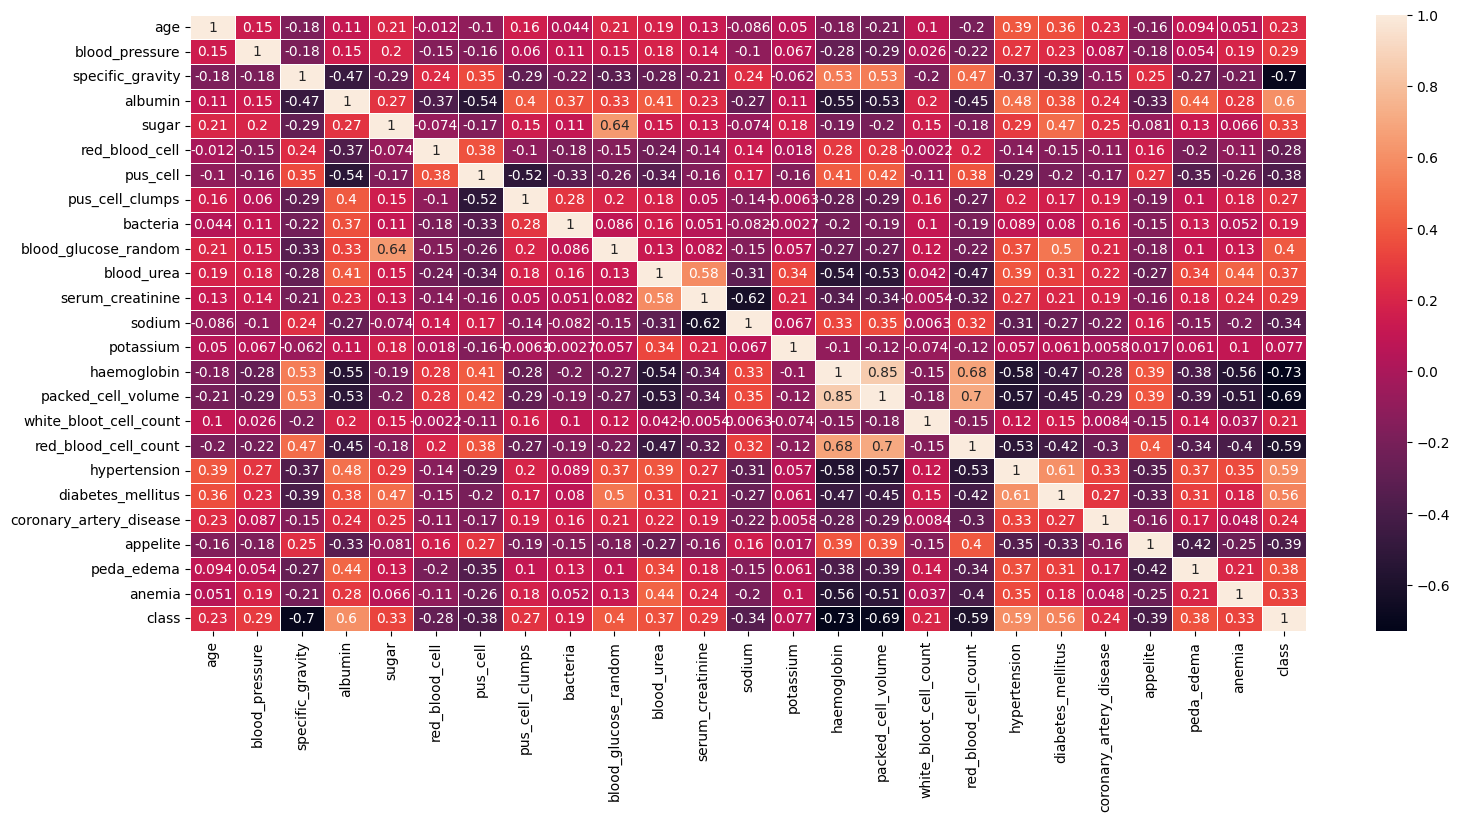

In [37]:
plt.figure(figsize=(18,8))
sns.heatmap(df_data.corr(),annot=True,linewidths=.5)
plt.show()

In [38]:
target_corr=df_data.corr()['class'].abs().sort_values(ascending=False)[1:]

In [39]:
target_corr

haemoglobin                0.729628
specific_gravity           0.698957
packed_cell_volume         0.690060
albumin                    0.599238
red_blood_cell_count       0.590913
hypertension               0.590438
diabetes_mellitus          0.559060
blood_glucose_random       0.401374
appelite                   0.393341
pus_cell                   0.375154
peda_edema                 0.375154
blood_urea                 0.372033
sodium                     0.342288
sugar                      0.327812
anemia                     0.325396
serum_creatinine           0.294079
blood_pressure             0.290600
red_blood_cell             0.282642
pus_cell_clumps            0.265313
coronary_artery_disease    0.236088
age                        0.225405
white_bloot_cell_count     0.205274
bacteria                   0.186871
potassium                  0.076921
Name: class, dtype: float64

In [40]:
df_data['class'].value_counts()

class
1    250
0    150
Name: count, dtype: int64

In [41]:
x=df_data.drop(columns=['class'])

In [42]:
y=df_data["class"]

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=25)

In [44]:
x_train.shape

(300, 24)

In [45]:
x_test.shape

(100, 24)

In [46]:
y_train.shape

(300,)

In [47]:
y_test.shape

(100,)

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dct=DecisionTreeClassifier()

In [50]:
dct.fit(x_train,y_train)

DecisionTreeClassifier()

In [51]:
y_pred_dct=dct.predict(x_test)

In [52]:
y_pred_dct

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1])

In [53]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [54]:
models = []

In [55]:
models.append(('Naive Bayes', GaussianNB()))

In [56]:
#models.append(('KNN', KNeighborsClassifier(n_neighbors=8)))

In [57]:
models.append(('RandomForestClassifier ', RandomForestClassifier()))

In [58]:
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))

In [59]:
models.append(('SVM', SVC (kernel='linear')))

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

In [61]:
for name, model in models:
    print(name, model)
    print()

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    print(confusion_matrix(y_test, y_pred))
    print('\n')

    print("accuracy: ", accuracy_score(y_test, y_pred))
    print('\n')

    print("precision: ", precision_score(y_test, y_pred))
    print('\n')

    print("recall: ", recall_score(y_test, y_pred))
    print('\n')

    print("f1 score: ", f1_score(y_test, y_pred))
    print('\n')


Naive Bayes GaussianNB()

[[37  0]
 [ 5 58]]


accuracy:  0.95


precision:  1.0


recall:  0.9206349206349206


f1 score:  0.9586776859504132


RandomForestClassifier  RandomForestClassifier()

[[35  2]
 [ 0 63]]


accuracy:  0.98


precision:  0.9692307692307692


recall:  1.0


f1 score:  0.984375


DecisionTreeClassifier DecisionTreeClassifier()

[[35  2]
 [ 1 62]]


accuracy:  0.97


precision:  0.96875


recall:  0.9841269841269841


f1 score:  0.9763779527559056


SVM SVC(kernel='linear')

[[34  3]
 [ 2 61]]


accuracy:  0.95


precision:  0.953125


recall:  0.9682539682539683


f1 score:  0.9606299212598425




In [62]:
model.score(x_train,y_train)

0.99

In [63]:
rfc=RandomForestClassifier()

In [65]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [67]:
rfc.score(x_train,y_train)

1.0

In [ ]:
y_predict=pd.DataFrame(.predict(x_train),columns=['y_predicted'])